In [1]:
import tensorflow as tf

d:\dev\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\dev\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\dev\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\dev\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
print(tf.__version__)

1.10.0


In [4]:
data=input_data.read_data_sets('MNIST/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
import os
os.listdir('MNIST/')

['images',
 't10k-images-idx3-ubyte.gz',
 't10k-labels-idx1-ubyte.gz',
 'train-images-idx3-ubyte.gz',
 'train-labels-idx1-ubyte.gz']

In [6]:
print('Image Inventory')
print('------------')
print('Training: {}'.format(len(data.train.labels)))
print('Testing:  {}'.format(len(data.test.labels)))
print('------------')

Image Inventory
------------
Training: 55000
Testing:  10000
------------


In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

-----------------
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


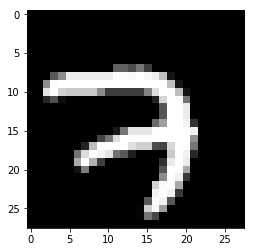

-----------------
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


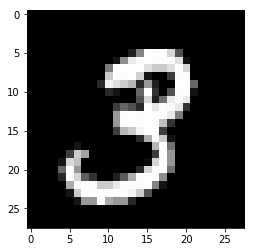

In [8]:
for i in range(2):
    image = data.train.images[i]
    image = np.array(image, dtype='float')
    label = data.train.labels[i]
    pixels = image.reshape((28,28))
    plt.imshow(pixels, cmap='gray')
    print('-----------------')
    print(label)
    plt.show()

In [9]:
if not os.path.exists('MNIST/images'):
    os.makedirs('MNIST/images/')
os.chdir('MNIST/images/')

In [10]:
from matplotlib import image
for i in range(1, 10):
    png = data.train.images[i]
    png = np.array(png, dtype='float')
    pixels = png.reshape((28,28))
    image.imsave('iamge_no_{}.png'.format(i), pixels, cmap='gray')

In [11]:
print(os.listdir())

['iamge_no_1.png', 'iamge_no_2.png', 'iamge_no_3.png', 'iamge_no_4.png', 'iamge_no_5.png', 'iamge_no_6.png', 'iamge_no_7.png', 'iamge_no_8.png', 'iamge_no_9.png']


In [12]:
from Augmentor import Pipeline

In [13]:
augmentor = Pipeline('/workspace/PyCharmProjects/MNIST/images')

Initialised with 9 image(s) found.
Output directory set to /workspace/PyCharmProjects/MNIST/images\output.

In [14]:
augmentor.rotate(probability=0.9,max_left_rotation=25,max_right_rotation=25)

In [15]:
for i in range(1, 3):
    augmentor.sample(10)

Processing <PIL.Image.Image image mode=RGBA size=28x28 at 0x254A4A46748>: 100%|█| 10/10 [00:00<00:00, 294.04 Samples/s]
Processing <PIL.Image.Image image mode=RGBA size=28x28 at 0x254A4A53978>: 100%|█| 10/10 [00:00<00:00, 256.44 Samples/s]


In [16]:
xtrain = data.train.images
ytrain = np.asarray(data.train.labels)
xtest = data.test.images
ytest = np.asarray(data.test.labels)

In [17]:
xtrain = xtrain.reshape(xtrain.shape[0],28,28,1)
xtest = xtest.reshape(xtest.shape[0],28,28,1)
ytest = ytest.reshape(ytest.shape[0],10)
ytrain = ytrain.reshape(ytrain.shape[0],10)

In [18]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(55000, 28, 28, 1)
(55000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [19]:
import keras

Using TensorFlow backend.


In [19]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D

K.set_image_dim_ordering('tf')

model = Sequential()

model.add(Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

Using TensorFlow backend.


In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])

In [21]:
model.fit(xtrain, ytrain, batch_size=512,
         epochs=5,
         validation_data=(xtest, ytest))

Train on 55000 samples, validate on 10000 samples
Epoch 1/5
55000/55000 [==============================] - ETA: 7:25 - loss: 2.3106 - acc: 0.099 - ETA: 1:50 - loss: 2.0147 - acc: 0.478 - ETA: 1:02 - loss: 1.6518 - acc: 0.609 - ETA: 42s - loss: 1.3539 - acc: 0.671 - ETA: 32s - loss: 1.1456 - acc: 0.71 - ETA: 25s - loss: 1.0044 - acc: 0.74 - ETA: 21s - loss: 0.9024 - acc: 0.77 - ETA: 18s - loss: 0.8275 - acc: 0.78 - ETA: 15s - loss: 0.7717 - acc: 0.79 - ETA: 13s - loss: 0.7324 - acc: 0.80 - ETA: 11s - loss: 0.6898 - acc: 0.81 - ETA: 10s - loss: 0.6510 - acc: 0.82 - ETA: 9s - loss: 0.6137 - acc: 0.8375 - ETA: 8s - loss: 0.5873 - acc: 0.843 - ETA: 7s - loss: 0.5620 - acc: 0.850 - ETA: 6s - loss: 0.5405 - acc: 0.855 - ETA: 6s - loss: 0.5204 - acc: 0.860 - ETA: 5s - loss: 0.5032 - acc: 0.864 - ETA: 5s - loss: 0.4878 - acc: 0.868 - ETA: 4s - loss: 0.4734 - acc: 0.871 - ETA: 4s - loss: 0.4610 - acc: 0.874 - ETA: 3s - loss: 0.4477 - acc: 0.878 - ETA: 3s - loss: 0.4340 - acc: 0.881 - ETA: 3s - l

In [25]:
stats = model.evaluate(xtest, ytest)


10000/10000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 80us/step


In [26]:
print('The accuracy rate is {}%'.format(round(stats[1],3)*100))
print('The loss rate is {}%'.format(round(stats[0],2)*100))

The accuracy rate is 98.6%
The loss rate is 4.0%


In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 2,361,546
Trainable params: 2,361,546
Non-trainable params: 0
_________________________________________________________________
